In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import sqlite3

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import create_session
from sqlalchemy.schema import Table, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///mental_health.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['Survey']

In [7]:
# Save references to each table
Survey = Base.classes.Survey


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()
Survey_col = []

columns = inspector.get_columns('Survey')
for c in columns:
    Survey_col.append(c['name'])
    print(c['name'], c["type"])
    
    Survey_col

SurveyID INTEGER
Description VARCHAR(255)


In [10]:
# top 5 Surveys
engine.execute('SELECT * FROM Survey LIMIT 5').fetchall()

[(2014, 'mental health survey for 2014'),
 (2016, 'mental health survey for 2016'),
 (2017, 'mental health survey for 2017'),
 (2018, 'mental health survey for 2018'),
 (2019, 'mental health survey for 2019')]

In [11]:
df = pd.read_sql_query("SELECT * FROM survey", conn)

In [12]:
df.head


<bound method NDFrame.head of    SurveyID                    Description
0      2014  mental health survey for 2014
1      2016  mental health survey for 2016
2      2017  mental health survey for 2017
3      2018  mental health survey for 2018
4      2019  mental health survey for 2019>

In [13]:
sql = """
SELECT name FROM  sqlite_master 
WHERE type ='table';
"""
df = pd.read_sql(sql=sql, con=conn)
df.head()

,name
0,Answer
1,Question
2,Survey


In [14]:
table = pd.read_sql("SELECT * FROM survey" ,conn)
table

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [15]:
sql = """
SELECT *
FROM Question;
"""
question = pd.read_sql(sql=sql, con=conn)
question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [16]:
sql = """
SELECT *
FROM Answer;
"""
answer = pd.read_sql(sql=sql, con=conn)
answer.head(20)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
5,33,2014,6,1
6,35,2014,7,1
7,39,2014,8,1
8,42,2014,9,1
9,23,2014,10,1


In [17]:
answer.shape

(236898, 4)

In [18]:
answer.nunique()

AnswerText    4215
SurveyID         5
UserID        4218
QuestionID     105
dtype: int64

In [19]:
answer.UserID.nunique()

4218

In [20]:
df = pd.DataFrame({'UserID': answer.UserID.unique()})
df.head()

,UserID
0,1
1,2
2,3
3,4
4,5


In [21]:
answer_age = answer[answer['QuestionID']==1]
list_age = []
for user in df.UserID:
    age = int(answer_age[answer_age['UserID']==user]['AnswerText'].values[0])
    if age > 25 and age < 60:
        list_age.append(age)
    else:
        list_age.append(None)
df['age'] = list_age
df.head()

,UserID,age
0,1,37.0
1,2,44.0
2,3,32.0
3,4,31.0
4,5,31.0


In [22]:
answer[answer['QuestionID']==2].AnswerText.value_counts()

Male                         2830
Female                        914
male                          212
female                        110
-1                             24
                             ... 
Genderfluid (born female)       1
\-                              1
Bigender                        1
Ostensibly Male                 1
NB                              1
Name: AnswerText, Length: 101, dtype: int64

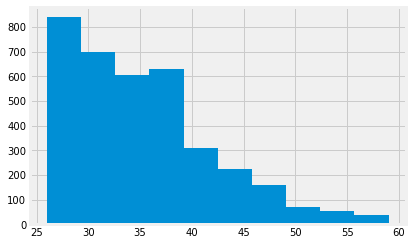

In [23]:
df.age.hist()